In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_blobs 
import warnings 
warnings.filterwarnings('ignore')

In [8]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [9]:
X

array([[ -9.03716573,   4.97234123],
       [-10.99049643,   3.39416171],
       [ -8.97394308,   5.07522205],
       ...,
       [ -2.28231163,   5.06614423],
       [ -1.48117508,   2.7161855 ],
       [ -4.47559911,  -7.74649279]], shape=(1000, 2))

In [10]:
y

array([0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1,
       1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2,
       0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0,
       2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 0,
       1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1,
       0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2,
       2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0,

Text(0, 0.5, 'Second feature')

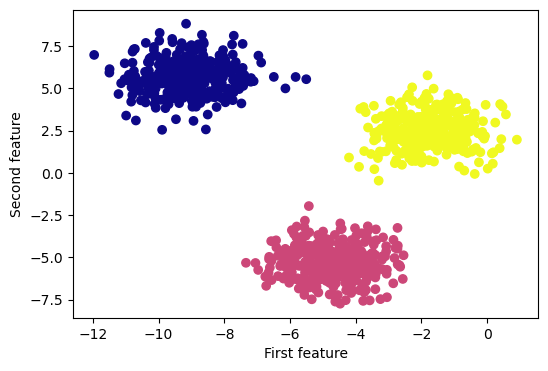

In [12]:
plt.figure(figsize=(6,4)) 
plt.scatter(X[:,0],X[:,1],c=y, cmap='plasma') 
plt.xlabel('First feature') 
plt.ylabel('Second feature')

In [13]:
# split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.25, random_state=42)

In [14]:
# Standardization 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.cluster import KMeans

In [17]:
## Elbow method To select the k value
wcss=[]
for k in range(1,11): 
    kmeans= KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[1500.0000000000002,
 564.6221558770542,
 108.20055256185222,
 93.11668287219865,
 76.12824973545548,
 59.21609889374764,
 54.971809500569286,
 49.503942160225456,
 46.42821098353468,
 42.505371529297236]

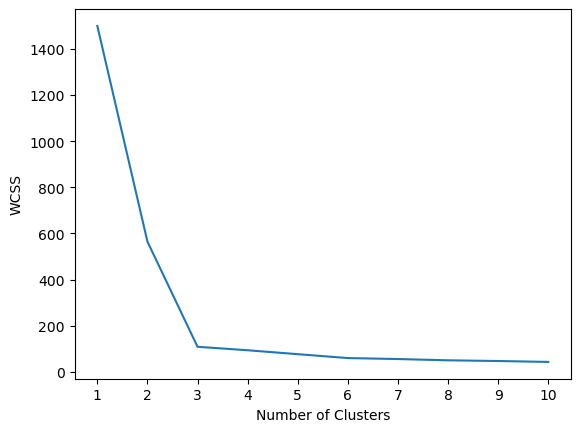

In [19]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [21]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 1, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2,
       1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1,

In [22]:
y_pred = kmeans.predict(X_test_scaled)

In [23]:
y_pred

array([2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2,
       2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2,
       2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2,
       0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1,
       0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1,
       2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 0, 2, 2], dtype=int32)

Text(0, 0.5, 'Second feature')

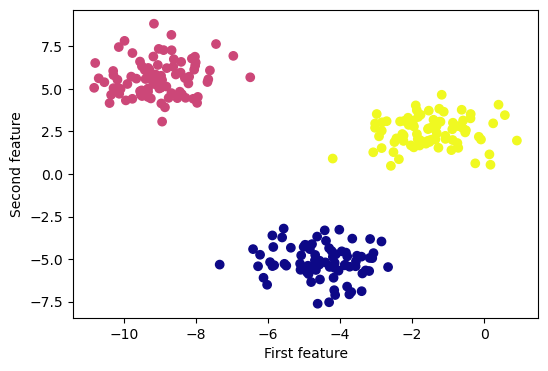

In [24]:
plt.figure(figsize=(6,4)) 
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred, cmap='plasma') 
plt.xlabel('First feature') 
plt.ylabel('Second feature')

In [ ]:
## Validate the K value with 2 methods
## 1.kneeLocator
## 2.Silhoutte Scoring

In [25]:
# KneeLocator
! pip install kneed

In [26]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve= 'convex', direction= 'decreasing') 

In [27]:
kl.elbow

np.int64(3)

In [ ]:
# Silhoutte Scoring
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients = []
for k in range(2,11): 
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients

[0.6197882157776143,
 0.7668660003340718,
 0.6406532752774523,
 0.5079554614182489,
 0.48456965169944505,
 0.3711107300763415,
 0.3440914237699821,
 0.34805939870805136,
 0.32338939358720115]

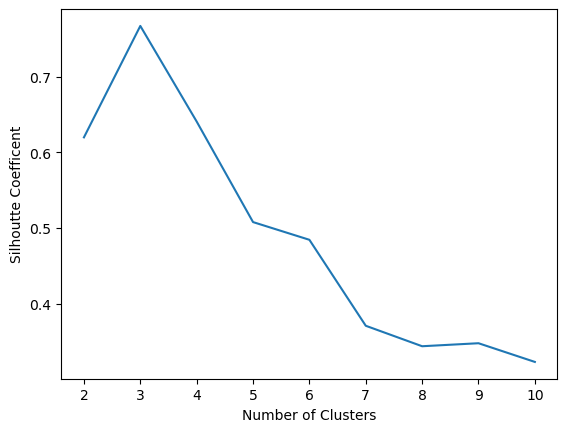

In [31]:
# plotting silhouette score 
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficent")
plt.show()